# Advanced Validation Assignment
## Evan Thompson

0.  Using breast_cancer.csv, create a random forest model that predicts malignant given the other relevant variables.  Use a single holdout (test/train split).  Use Grid Search to optimize model hyperparameters.  Measure the model's performance using AUC, Accuracy, Precision, and Recall.

1.  Implement K-Fold Cross Validation, with 10 folds, on your Breast Cancer Model

2.  Report on how the K-Fold CV score compared to your single holdout AUC

3.  Write a short description of your model's performance.   Include AUC, Accuracy, Precision, and Recall in your discussion.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("breast_cancer.csv")

## Create a random forest model that predicts malignant given the other relevant variables. Use a single holdout (test/train split). Use Grid Search to optimize model hyperparameters. Measure the model's performance using AUC, Accuracy, Precision, and Recall.

In [3]:
data.head()  #view column names and top rows

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
data = data.drop(['Unnamed: 0', 'id number'], axis=1)

In [6]:
#Setting malignant as the dependent variable
y = data.pop("malignant")

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(data, y, test_size=.2, random_state=78)

### Grid Search

In [24]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

estimator1 = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [25]:
estimator.fit(X_train, y_train)
estimator1.fit(X1_train, y1_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
best_rfc = estimator.best_estimator_
best_rfc1 = estimator1.best_estimator_

### Accuracy

In [12]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.971428571429


### Precision and Recall

In [13]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



### AUC

In [27]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

roc1 = roc_auc_score(y1_test, best_rfc.predict_proba(X1_test)[:,1])
print "AUC1 Score: ", roc1

AUC Score:  0.995555555556
AUC1 Score:  0.999520498681


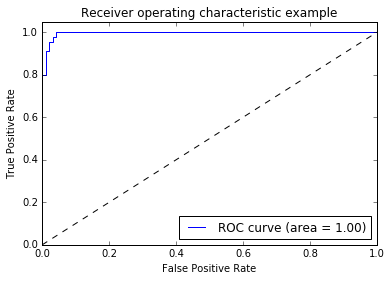

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

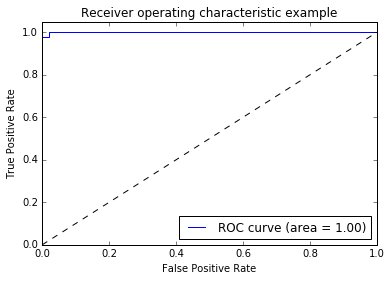

In [28]:
fpr, tpr, thresholds = roc_curve(y1_test, best_rfc.predict_proba(X1_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Implement K-Fold Cross Validation, with 10 folds, on your Breast Cancer Model

In [35]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)
scores1 = cross_validation.cross_val_score(best_rfc1, data, y, cv=10)

In [36]:
print "Scores: " + str(scores)
print "Scores1: " + str(scores1)

Scores: [ 0.92957746  0.97142857  0.97142857  0.91428571  0.98571429  0.98571429
  0.97142857  0.98571429  0.98550725  1.        ]
Scores1: [ 0.92957746  0.97142857  0.97142857  0.91428571  0.98571429  0.98571429
  0.98571429  0.98571429  0.98550725  1.        ]


In [18]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968631 +/-  0.017444
95 percent probability that if this experiment were repeated over and over the average score would be between 0.951187 and 0.986075


In [37]:
mean_score1 = scores1.mean()
std_dev1 = scores1.std()
std_error1 = scores1.std() / math.sqrt(scores1.shape[0])
ci1 =  2.262 * std_error1
lower_bound1 = mean_score1 - ci1
upper_bound1 = mean_score1 + ci1

print "Score is %f +/-  %f" % (mean_score1, ci1)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound1, upper_bound1)

Score is 0.971508 +/-  0.018718
95 percent probability that if this experiment were repeated over and over the average score would be between 0.952790 and 0.990227


### Report on how the K-Fold CV score compared to your single holdout AUC

### Single Holdout (Test/Train Split Test) AUC

In [29]:
print "AUC Score: ", roc
print "AUC1 Score: ", roc1

AUC Score:  0.995555555556
AUC1 Score:  0.999520498681


### K-Fold Cross Validation, k=10  AUC

In [21]:
print "Score is %f +/-  %f" % (mean_score, ci)

Score is 0.968631 +/-  0.017444


The statistical AUC for the K-Fold model of 0.970060 is lower than that of the holdout set of 0.996257309942. AUC is a metric for model comparison that returns the area under the curve between the true positive rate and the false positive rate. Therefore the fitting of the model comparatively to the randomness and quality of the splits becomes important. I will show my point by choosing a different random seed to rerun the holdout set. As can be seen in the AUC1 score with changing the random seed, the AUC for the test/train split increased. However when the K-Fold is ran again it is within the same range for confidence. 